### Audio Signal

An audio signal is a representation of sound, typically as an electrical voltage for analog signals and a binary number for digital signals. Audio signals have frequencies in the audio frequency range of roughly 20 to 20,000 Hz (the limits of human hearing). Typically is also a vibration that propagates as an audible wave of pressure, through a transmission medium such as a gas, liquid or solid.

###### Basics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A pure tone is a tone with a sinusoidal waveform; this is, a sine wave of any frequency, phase, and amplitude.

A sine wave is characterized by its frequency, the number of cycles per second, its amplitude, the size of each cycle, and its phase that indicates the time alignment relative to a zero-time reference point.

1. Frequency - number of occurrences of a repeating event per unit of time.
    
    $f = \dfrac{1}{T}(hz)$ where T is the period or better said the duration each idependent cycle 
    
  
    
2. Amplitude, sound pressure or intensity - the larger the vibrations the louder a sound is.

##### Examples of waveforms taken with cos as the simples waveform:

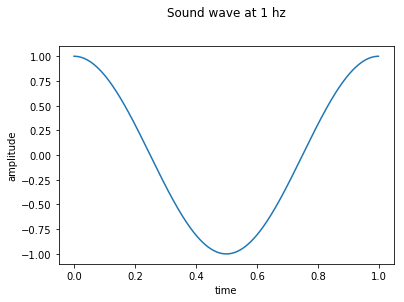

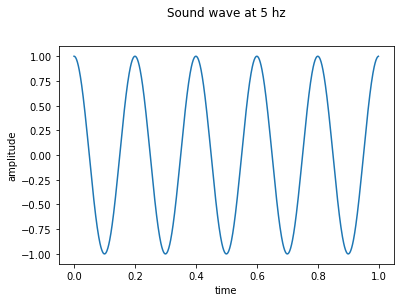

In [2]:
x = np.arange(0, 1, 0.001)

# Frequency 1 hz
fq = 1

plt.title("Sound wave at 1 hz", pad = 30)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(x, np.cos(x * 2 * np.pi * fq))
plt.show()

# Frequency 5 hz
fq = 5

plt.title("Sound wave at 5 hz", pad = 30)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(x, np.cos(x * 2 * np.pi * fq))
plt.show()

Where real sounds are composed of thousand of pure tones that all combined produce a distinct waveform like:

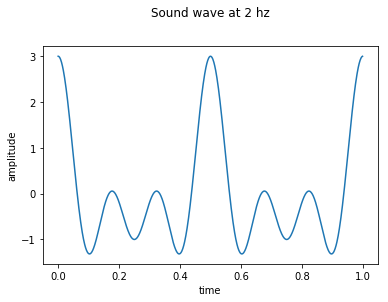

In [3]:
x = np.arange(0, 1, 0.001)

# Frequencies 2, 4, 6 hz that are all combined together to create custom waveform
fqs = [2, 4, 6]

def amplitude(x):
    sum = 0
    for f in fqs:
        sum += np.cos(x * 2 * np.pi * f)
        
    return sum

plt.title("Sound wave at 2 hz", pad = 30)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(x, amplitude(x))
plt.show()

They are hundreds of musical instruments like guitars, drums, bass guitar, piano that offer a combination of different but related frequencies that combined together create distinctive tone of the instrument.

The lowest frequency is usually dominant like in the upper case where the frequency 2hz is the lowest and the dominant one that you will hear the most considered as pitch, but it's no always the case and we'll see it later.

Even though playing the same note will produce the same output, that's not the case because of harmonics. Because, each instrument has its notes divided by an octave that represents the interval between one musical pitch and another with half or double its frequency.

(E.G) Piano, the notes starts with C D E F G A B | C D E F G A B | C D E F G A B | ... where each divider represents an end of an octave, let's take the 4th octave as an example:

1. C4 = 261.626 hz
2. D4 = 293.665 hz
3. E4 = 329.627 hz
4. G4 = 391.995 hz
5. A4 = 440.000 hz
6. B4 = 493.883 hz

Thus, arriving at the end of an octave, we are continuing with C5 that is double the frequency of C4, the same as D5 being double of D4, ...

$ C5 = C4 * 2 = 261.626 * 2 = 523.252\ hz$

Where 4th octave is from 261.626 hz up to 523.252 hz and the following 5th octave is from 523.252 hz to 1046.502 hz and so on and on...

This is because musical instruments do not vibrate at a single frequency: a given note involves vibrations at many different frequencies, often called harmonics, partials, or overtones. The relative pitch and loudness of these overtones gives the note a characteristic sound we call the timbre of the instrument. Given that they operate on multitude of frequencies that makes up the note, so each instrument has its specific sound. 

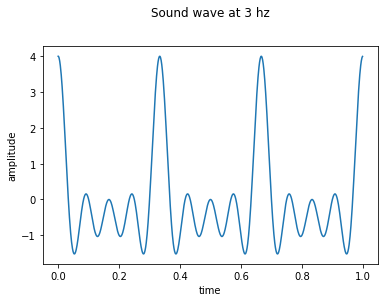

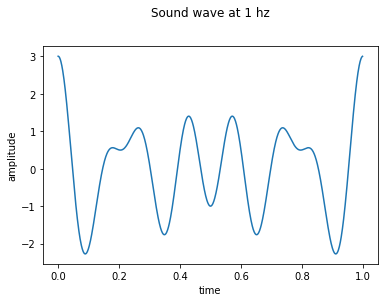

In [4]:
# Frequencies 3, 6, 9, 12 hz that are all combined together to create custom waveform
# They are often called harmonics where the 3 hz wave is the harmonic fundamental
# Thus the harmonic fundamental is a integer multiple of all other frequencies
# 12 = 4 * 3, 9 = 3 * 3, ...
fqs = [3, 6, 9, 12]

plt.title("Sound wave at 3 hz", pad = 30)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(x, amplitude(x))
plt.show()

# Frequencies 4, 5, 7 hz are not harmonics because the fundamental one 3 hz is not an integer multiple
fqs = [4, 5, 7]


plt.title("Sound wave at 1 hz", pad = 30)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(x, amplitude(x))
plt.show()

What we have seen so far is the <b>Time-Domain</b> that represents the variation of amplitude of signal with time. Where amplitude is maped to the respect of time that makes up the time domain signal.

(E.G) At 0.25 sec we can have an aproximative amplitude of 4, while at 2.21 sec we can have an amplitude of 21.

Next, is the <b>Frequency-Domain</b> analysis shows how the signal's energy is distributed over a range of frequencies.
It hold information about the signal's magnitude and also the phase at each frequency. The output of the FFT computation is complex, by having a real part and an imaginary part, that hold enough information for us to compute the Magnitude of each frequency as follows:

$ \sqrt{x_r ^ 2 + x_i ^ 2} $

And the phase of the signal that tells you how all the frequency components align in time computed as:

$ \arctan(x_i\ /\ x_r) $

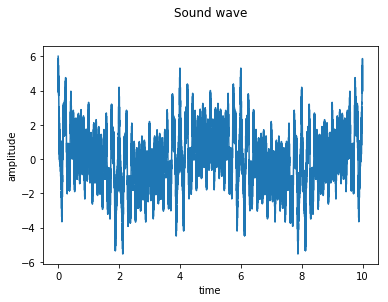

1.0


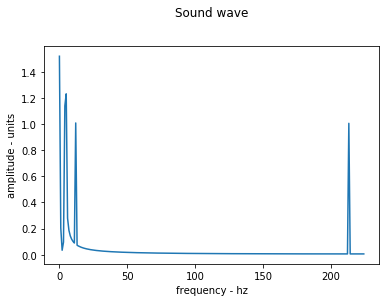

In [5]:
import numpy as np

# sample rate that we will operate on
sampling_rate = 450

# working on corresponding frequencies
fqs = [0.2, 4, 4.5, 5, 12, 213]

# generating the time domain of the signal
t = np.arange(0, 10, 1 / sampling_rate)

# signal generation
wave = amplitude(t)

# plotting the signal
plt.title("Sound wave", pad = 30)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.plot(t, wave)
plt.show()

# size of output frequency bins of the FFT same as the size of signal
fft_size = len(t)

# size of the window - number of samples taken 
# increasing the window - higher frequency resolution but will lower the accuracy at observing fast changing notes
window = int(sampling_rate)

# half of output result is unnecessary
S = int(window / 2)

# sample space in time domain, distance between current sample and the following one
sample_space = 1 / sampling_rate

# frequencies bins creation
bins = np.fft.fftfreq(window, sample_space)[:S]

# window affects the freq resolution, each nth bin - freq [n * bin_sample, (n + 1) * bin_sample]
bin_sample = sampling_rate / window
print(bin_sample)

# dft result with [:S] is equal to [S:]
fft_output = np.fft.fft(wave[:window])[:S]

# amplitude extractor from the dft data by taking the magnitude of a complex number 
magnitude_extractor = lambda x : np.sqrt(np.real(x) ** 2 + np.imag(x) ** 2) / S 

# magnitude extraction of the signal
fft_data = magnitude_extractor(fft_output)

# range of the output frequencies detected by the FFT is half of the sample rate - 15 hz
# note that increasing the sampling_rate we will able to detect higher frequencies like 200 with sampling_rate > 400
# here is a trade-off between accuracy and performance, higher sampling_rate gives 
# better analysis while requiring heavy computation operations
plt.title("Sound wave", pad = 30)
plt.xlabel("frequency - hz")
plt.ylabel("amplitude - units")
plt.plot(bins, fft_data)
plt.show()

Downsample a signal:

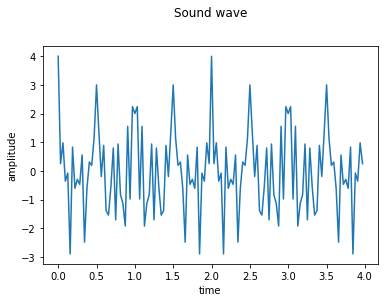

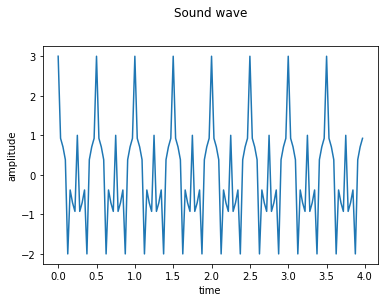

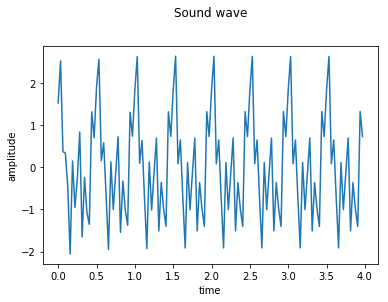

In [6]:
from scipy.signal import butter, lfilter

# working on corresponding frequencies
fqs = [2, 4, 15.5, 40]

def plot_graph(x_values, y_values):
    plt.title("Sound wave", pad = 30)
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.plot(x_values, y_values)
    plt.show()
    

def generate_signal(sample_rate):
    # generating the time domain of the signal
    t = np.arange(0, 4, 1 / sample_rate)
    
    # signal generation
    wave = amplitude(t)
    
    return (t, wave)
    
def plot_digital_signal(sample_rate):
    # signal generation
    t, wave = generate_signal(sample_rate)
    
    # plotting the signal
    plot_graph(t, wave)

# # original
# plot_digital_signal(16)

# # downsampling
# plot_digital_signal(8)

# # upsampling
# plot_digital_signal(32)

# signal filtering with a low-pass filter

# original
sample_rate = 32

# sample frequency
sample_frequency = 54

# original plot
fqs = [2, 4, 15.5, 54]
plot_digital_signal(sample_rate)

# expected
sample_rated_cutoff = 24

# expected plot
fqs = [2, 4, 20]
plot_digital_signal(sample_rate)

def low_pass_filter(data, cutoff_freq, sample_frequency):
    nyquist_freq = 0.5 * sample_frequency
    normal_cutoff = cutoff_freq / nyquist_freq
    
    b, a = butter(6, normal_cutoff, btype = 'low', analog = False)
    
    return lfilter(b, a, data)

t, wave = generate_signal(sample_rate)

down_scaled_wave = low_pass_filter(wave, sample_rated_cutoff, 54)
plot_graph(t, down_scaled_wave)

In [7]:
from scipy.io import wavfile
from scipy.signal import detrend
import numpy as np
import os
import math

# Bass Tone - 65 hz - 6
# Mid Tone - 440 hz - 7
# Up Tone - 1 khz - 8
# High Tone - 10 khz - 9
songs = [
    "Interpol - Obstacle 1",
    "Interpol - Obstacle 1 Recorded",
    "The xx - On Hold",
    "The xx - On Hold Recorded",
    "Lorde - Ribs",
    "Lorde - Ribs Recorded",
    "Bass Tone",
    "Mid Tone",
    "Up Tone",
    "High Tone"
]

notebook_path = os.path.abspath("Audio Signal.ipynb")

# convert a multi channel audio source to mono
def multi_dimen_to_mono(data):
    if(data.ndim == 1):
        return data
    
    nb_channels = data.shape[1]
    output = np.zeros(data.shape[0])
    for c in range(nb_channels):
        output += data[:, c]
    
    return output / nb_channels

# extracting the track
def extract_track(track_index):
    # file path of the chosen track
    file_path = os.path.join(os.path.dirname(notebook_path), "songs\\test\\" + songs[track_index] + ".wav")
    
    # extracting sampling rate and samples
    sampling_rate, samples = wavfile.read(file_path)
    
    # multi channel to mono
    return sampling_rate, multi_dimen_to_mono(samples)

# magnitude extractor
def magnitude_extractor(x, N):
    return 20 * np.log10(np.sqrt(np.real(x) ** 2 + np.imag(x) ** 2) / N + 1)

# parse a spec.win starting from time(s) signal
def parse_sec_signal(data, spec, time):
    # result dft data
    result = []
    
    # offset where we start sample the data from source
    offset = int(spec.sampling_rate * time)
    
    # sample rate
    sample_rate = int(spec.get_freq_res())
    
    # sampling at rate
    for i in range(sample_rate):
        sample_data = data[offset + spec.win * i: offset + spec.win * (i + 1)]
    
        sample_data = detrend(sample_data) * spec.window

        dft_output = np.fft.fft(sample_data)[:spec.H]
        
        dft_mag = magnitude_extractor(dft_output, spec.H)
        
        result.append(dft_mag)

    return result

class Spectrogram:    
    def __init__(self, win, sampling_rate):
        # size of window
        self.win = win
        
        # sampling rate
        self.sampling_rate = sampling_rate
        
        # kaiser window for reducing spectral leakage
        self.window = np.kaiser(win, beta = 14)
        
        # nyquist frequency
        self.N = int(sampling_rate / 2)
        
        # half bins are important
        self.H = int(win / 2)
        
        # frequencies bins creation
        self.bins = np.fft.fftfreq(win, 1 / sampling_rate)[:self.H]
        
        # freq resolution
        self.freq_resolution = self.sampling_rate / self.win
        
    def get_freq_res(self):
        return int(self.freq_resolution)
    
    def show_sec_signal(self, output, second, index, spec):
        # dft of the sample
        sxx = parse_sec_signal(output, spec, second)
        
        plt.plot(spec.bins, sxx[index], color = 'k')
        plt.xlabel('Frequency (kHz)')
        plt.ylabel('Power (dB)')
        plt.show()

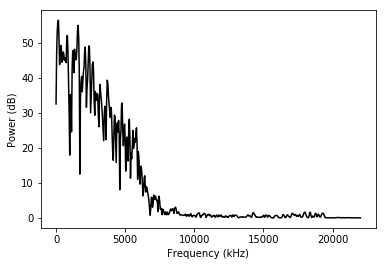

In [8]:
 # track samples
sampling_rate, raw = extract_track(0)

test_spec = Spectrogram(1024, sampling_rate)
test_spec.show_sec_signal(raw, 3, 40, test_spec)

Short-time Fourier transform, which entails dividing the whole signal into intervals and taking the DFT in each of those intervals. The frequency resolution is smaller in each interval than the resolution obtained by taking the DFT on the whole interval, but there is less variability in each interval. This allows you to distinguish the frequency components in separate intervals more clearly.

In [9]:
class ShortFourirer:
    def __init__(self, track_index, start_time, end_time, win = 2048):
        # extracting data
        self.sampling_rate, self.input = extract_track(track_index)
        
        # track seconds
        track_seconds = int(len(self.input) / self.sampling_rate)
        
        # start time
        self.start_time = start_time

        # end time
        self.end_time = min(end_time, track_seconds)
        
        # current spectrogram
        self.current_spec = Spectrogram(win, self.sampling_rate)
        
        # sample rate
        self.sample_rate = int(self.current_spec.get_freq_res())
        
        # time domain
        self.t = np.linspace(self.start_time, self.end_time, self.sample_rate * (self.end_time - self.start_time))
        
        # frequency domain
        self.data = self.calculate_dft(self.input)
        
    def get_spec(self):
        return self.current_spec
        
    # applying short-time Fourier transform, by dividing the whole signal into intervals
    def calculate_dft(self, data):
        result = []
        
        for i in range(self.start_time, self.end_time):
            result += parse_sec_signal(data, self.current_spec, i)
            
        return np.array(result)
    
    def get_parameters(self):
        return (self.t, self.current_spec.bins, self.data)
    
    def show_spectrogram(self):
        t, f, Sxx = self.get_parameters()

        plt.pcolormesh(t, f, Sxx.T, cmap = 'YlGnBu_r', shading = 'gouraud')
        plt.colorbar()
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.show()


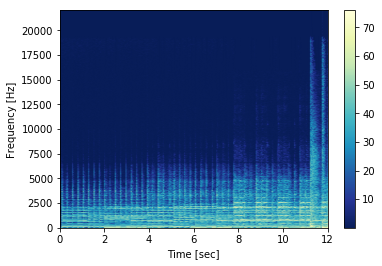

In [19]:
short_fourier = ShortFourirer(0, 0, 12, 2048)
short_fourier.show_spectrogram()

In [11]:
# Logarithmic band builder for storing the most prominent frequency bins
class BandBuilder:
    message = "Band %d - from %.3f hz to %.3f hz"
    
    def __init__(self, nyquist_freq = 4096, offset_freq = 0, offset_log = 14, base = 1.415):
        # offset frequency because logarithm derivative is low at the start
        self.offset_freq = offset_freq
        
        # offset logarithm
        self.offset_log = offset_log
        
        # nyquist freq
        self.nyquist_freq = nyquist_freq
        
        # logarithm base
        self.base = base
        
        # band count
        self.count = self.get_count()
        
        # offset value
        self.offset_value = self.offset_freq + self.base ** self.offset_log
        
        # store band' frequency coverage
        self.bands = [ self.offset_freq + self.base ** (x + self.offset_log) for x in range(self.count + 1) ]
        
    def get_count(self):
        remaining_freq = self.nyquist_freq - self.offset_freq
        
        return math.ceil(math.log(remaining_freq, self.base)) - self.offset_log
        
        
    def show(self):
        prov = 0
        
        for index, band in enumerate(self.bands):
            print(self.message % (index, prov, band))
            
            prov = band
            
    def create_band(self):
        return np.zeros(self.count)
        
    def get_band(self, value):
        if value > self.offset_value:
            return math.ceil(math.log(value, self.base) - self.offset_log)
        else: return 0
        
    def get_band_value(self, value):
        return self.base ** (self.offset_log + value) + self.offset_freq
        
# Band class with index within the logarithmic bands and its maximum amplitude
class Band:
    def __init__(self, index, mag):
        self.index = index
        self.mag = mag

In [12]:
# band_builder = BandBuilder()
# band_builder.show()

In [13]:
class MaxBands:
    def __init__(self, short_fourier, band_builder, coef):
        # coefficient
        self.coef = coef
        
        # short fourier
        self.short_fourier = short_fourier
        
        # dft data
        _, _, self.data = self.short_fourier.get_parameters()
        
        # band builder
        self.band_builder = band_builder
        
    # we compute the strongest bins for the bands
    def get_max_bands(self):
        result = []

        for sample in self.data:
            max_band = self.band_builder.create_band()

            for index, value in enumerate(sample):
                current_band = self.band_builder.get_band(index * self.short_fourier.get_spec().get_freq_res())

                if current_band < self.band_builder.count:
                    max_band[current_band] = max(max_band[current_band], value)

            result.append(max_band)
        
        return result
    
    def get_average(self, bands):
        return np.average(bands, axis = 0)
    
    def get_short_fourier(self):
        return self.short_fourier
    
    def get_data(self):
        return self.data
    
    def get_bands(self):
        bands_max = self.get_max_bands()
        
        bands_average = self.get_average(bands_max) * self.coef
        
        bands_filtered = [[ self.band_builder.get_band_value(index) for index, mag in enumerate(sample)\
                           if mag > bands_average[index] ] for sample in bands_max ]
        
        return bands_filtered
    
    def show_bands(self):
        filtered_bands = self.get_bands()
        
        for index, values in enumerate(filtered_bands):
            total_bands = len(values)
            
            plt.scatter([self.short_fourier.start_time + index / self.short_fourier.get_spec().get_freq_res()]\
                        * total_bands, values)
            
        plt.xlabel("Time in s")
        plt.ylabel("Frequency - hz")
        plt.show()

In [14]:
# short_fourirer = ShortFourirer(0, 10, 20, 2048)
# band_builder = BandBuilder()
# max_bands = MaxBands(short_fourirer, band_builder, 1.085)
# max_bands.show_bands()

In [15]:
class Point:
    def __init__(self, freq_point, sample_index):
        self.freq_point = freq_point
        
        # current bin whitin sample
        self.sample_index = sample_index

# Addresses data to be generated on both server and client part
class Address:
    def __init__(self, freq_anchor, freq_point, delta_time):
        # frequency of the anchor
        self.freq_anchor = freq_anchor
        
        # frequency of the point
        self.freq_point = freq_point
        
        # delta time between 2 points
        self.delta_time = delta_time
        
    def get_pair_key(self):
        return int(str(int(self.freq_anchor)).zfill(5)\
                   + str(int(self.freq_point)).zfill(5) + str(int(self.delta_time)).zfill(9))
    
    def get_pair_value(self, key):
        key_s = str(key)
        return Address(int(key_s[:5]), int(key_s[5:10]), int(key_s[10:]))
        
    def print(self):
        print("[%f, %f, %f]" % (self.freq_anchor, self.freq_point, self.delta_time))
        
# Couple data to be stored on server
class Couple:
    def __init__(self, abs_time, track_index):
        # absolute time of the anchor
        self.abs_time = abs_time
        
        # current song index
        self.track_index = track_index
        

class Fingerprint:
    def __init__(self, collection, track_index, max_bands, target_group_d = 5, delta_dist = 3):
        # max bands class instance
        self.max_bands = max_bands
        
        # track index
        self.track_index = track_index
        
        # data we are working with
        self.input = self.max_bands.get_bands()
        
        # dimen of target group
        self.target_group_d = target_group_d
        
        # anchor delta distance from the target group
        self.delta_dist = delta_dist
        
        # fingerprint collection
        self.collection = collection
        
        
    def get_points(self):
        # freq_res that together with the index will generate the time space
        freq_res = self.max_bands.get_short_fourier().get_spec().get_freq_res()
        
        return [ Point(value, index / freq_res) for index, sample in enumerate(self.input) for value in sample ]
    
    def store_fingerprint(self):
        # points generation
        points = self.get_points()
        
        # overrall distance
        ovr_distance = (self.delta_dist + self.target_group_d)
        
        for anchor_index in range(0, len(points) - ovr_distance - 1):
            # anchor
            anchor = points[anchor_index]

            # couple
            couple = Couple(anchor.sample_index * 1000, self.track_index)

            for point in range(anchor_index + self.delta_dist, anchor_index + 1 + ovr_distance):
                # current point
                point = points[point]

                # delta time between the point <-> anchor in ms
                time_delta = (point.sample_index - anchor.sample_index) * 1000

                # current address
                address = Address(anchor.freq_point, point.freq_point, time_delta)

                # key value
                key_value = address.get_pair_key()

                # store them into the global collection 
                if key_value in self.collection:
                    self.collection[key_value].append(couple)
                else: self.collection[key_value] = [ couple ]
                    
    def get_fingerprint_keys(self):
        # key_values with pairs of key and abs time
        keys_values = []
        
        # overrall distance
        ovr_distance = (self.delta_dist + self.target_group_d)
        
        # points generation
        points = self.get_points()
        
        for anchor_index in range(0, len(points) - ovr_distance - 1):
            # anchor
            anchor = points[anchor_index]

            for point in range(anchor_index + self.delta_dist, anchor_index + 1 + ovr_distance):
                # current point
                point = points[point]

                # delta time between the point <-> anchor in ms
                time_delta = (point.sample_index - anchor.sample_index) * 1000

                # current address
                address = Address(anchor.freq_point, point.freq_point, time_delta)

                # key value
                key_value = address.get_pair_key()
                
                keys_values.append([key_value, anchor.sample_index * 1000])
                
        return keys_values
    
def generate_fingerprint(collection, band_builder, track_index):
    # apply short fourirer for each track
    short_fourirer = ShortFourirer(track_index, 10, 20, 2048)
    
    # compute the max bands
    max_bands = MaxBands(short_fourirer, band_builder, 1.085)
    
    # instantiate a fingerprint instance for storing/generating
    fingerprint = Fingerprint(collection, track_index, max_bands)
    
    return fingerprint

In [16]:
# testing_collection = {}
# fingerprint = generate_fingerprint(testing_collection, 0)
# t = fingerprint.get_fingerprint_keys()

In [17]:
training_data = [0, 2, 4]
testing_track = 1
    

def identify_song(training_data, testing_track):
    # training collection of tracks' fingerprints
    collection = {}
    
    # same freq bands for every track
    band_builder = BandBuilder()
    
    # generating the collection
    for t in training_data:
        training_fingerprint = generate_fingerprint(collection, band_builder, t)
        
        # store the fingerprints into the trainin collection
        training_fingerprint.store_fingerprint()
        
    # generate the testing fingerprint
    testing_fingerprint = generate_fingerprint(collection, band_builder, testing_track)
    
    # generating the test data
    testing_data = testing_fingerprint.get_fingerprint_keys()
    
    result = dict.fromkeys(training_data)
    for key in result:
        result[key] = { "count" : 0, "deltas" : [] }
        
    for address, abs_time in testing_data:
        if address in collection:
            couples = collection[address]
            
            for couple in couples:
                result[couple.track_index]["count"] += 1
                result[couple.track_index]["deltas"].append(couple.abs_time - abs_time)
                
    for key in result:
        print("Track nb %d with: %d" % (key, result[key]["count"]))
        print("NDY, sd = %d" % np.std(result[key]["deltas"]))
    
identify_song(training_data, testing_track)
    

Track nb 0 with: 929
NDY, sd = 3597
Track nb 2 with: 602
NDY, sd = 3690
Track nb 4 with: 285
NDY, sd = 4809
